<a href="https://colab.research.google.com/github/CamTu22/DAOTHICAMTU_20104009/blob/main/Nh%E1%BA%ADn_d%E1%BA%A1ng_hoa1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.utils import to_categorical
from keras.models import load_model
from keras.utils import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 

In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/BTVN_nhan_dien/flower/

/content/drive/MyDrive/Colab Notebooks/BTVN_nhan_dien/flower


In [3]:
train_data = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_set = train_data.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/BTVN_nhan_dien/flower/Train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 180 images belonging to 3 classes.


In [4]:
test_set = train_data.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/BTVN_nhan_dien/flower/Test',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 40 images belonging to 3 classes.


In [6]:
train_set.class_indices
test_set.class_indices

{'Mai': 0, 'Sen': 1, 'camtu cau': 2}

In [7]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(Flatten())
model.add(layers.Dense(512,activation = 'relu',input_shape = (150*150,)))
model.add(layers.Dense(3,activation = 'softmax'))

In [8]:
model.compile(optimizer ='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_set,epochs=500,batch_size=128,verbose=1, validation_data=test_set, callbacks=[EarlyStopping(monitor='val_loss', patience=20)])

Epoch 1/500
3/6 [==============>...............] - ETA: 33s - loss: 337.5858 - accuracy: 0.3452

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


6/6 [==============================] - 129s 23s/step - loss: 216.4475 - accuracy: 0.3556 - val_loss: 149.5021 - val_accuracy: 0.3750
Epoch 2/500
6/6 [==============================] - 2s 433ms/step - loss: 74.0823 - accuracy: 0.4944 - val_loss: 60.1369 - val_accuracy: 0.3000
Epoch 3/500
6/6 [==============================] - 2s 425ms/step - loss: 52.7986 - accuracy: 0.5389 - val_loss: 11.1879 - val_accuracy: 0.7250
Epoch 4/500
6/6 [==============================] - 2s 411ms/step - loss: 44.2465 - accuracy: 0.5611 - val_loss: 7.5984 - val_accuracy: 0.7250
Epoch 5/500
6/6 [==============================] - 2s 408ms/step - loss: 40.7676 - accuracy: 0.5222 - val_loss: 29.1291 - val_accuracy: 0.6500
Epoch 6/500
6/6 [==============================] - 2s 437ms/step - loss: 21.1585 - accuracy: 0.6556 - val_loss: 13.4672 - val_accuracy: 0.7000
Epoch 7/500
6/6 [==============================] - 2s 441ms/step - loss: 40.5707 - accuracy: 0.5833 - val_loss: 15.4514 - val_accuracy: 0.7500
Epoch 8/50

In [11]:
Score=model.evaluate(train_set,verbose=0)
print('Train Accuracy', Score[1])

Train Accuracy 0.7111111283302307


1/1 [==============================] - 0s 74ms/step
Hoa Sen


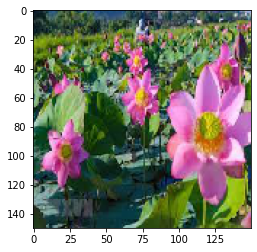

In [10]:
img = load_img('/content/sen1.jpg',target_size = (150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='Hoa Mai'
if round(result[0][1])==1:
  prediction='Hoa Sen'
if round(result[0][2])==1:
  prediction='Hoa Cẩm Tú cầu'
print(prediction)